# Breast Tissue 

In [ ]:
%pip install xlrd

In [2]:
import pandas as pd
import ehrapy as ep
import numpy as np
import ehrdata as ed
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option("display.max_columns", None)

## Getting the dataset

In [ ]:
!wget -nc http://archive.ics.uci.edu/ml/machine-learning-databases/00192/BreastTissue.xls -O breast_tissue.xls

# Data Wrangling

In [5]:
data = pd.read_excel("breast_tissue.xls", sheet_name='Data')

Change attribute "Case #" to "patient_id"

In [6]:
data = data.rename(columns={"Case #": "patient_id"})

In [7]:
data.set_index("patient_id", inplace=True)

In [8]:
data.to_csv("breast_tissue_prepared.csv")

## ehrapy sanity check

In [9]:
adata = ep.io.read_csv("breast_tissue_prepared.csv",
                   index_column="patient_id")

edata = ed.EHRData.from_adata(adata=adata)

In [10]:
ep.ad.feature_type_overview(edata)

! Feature  was detected as categorical features stored numerically.Please verify and correct using `ep.ad.replace_feature_types` if necessary.
! Feature types were inferred and stored in adata.var[feature_type]. Please verify using `ep.ad.feature_type_overview` and adjust if necessary using `ep.ad.replace_feature_types`.


 Detected feature types for AnnData object with 106 obs and 10 vars
╠══ 📅 Date features
╠══ 📐 Numerical features
║   ╠══ A/DA
║   ╠══ Area
║   ╠══ DA
║   ╠══ DR
║   ╠══ HFS
║   ╠══ I0
║   ╠══ Max IP
║   ╠══ P
║   ╚══ PA500
╚══ 🗂️ Categorical features
    ╚══ Class (6 categories)

In [11]:
edata = ep.pp.encode(
    edata, encodings={"one-hot": ["Class"]}
)

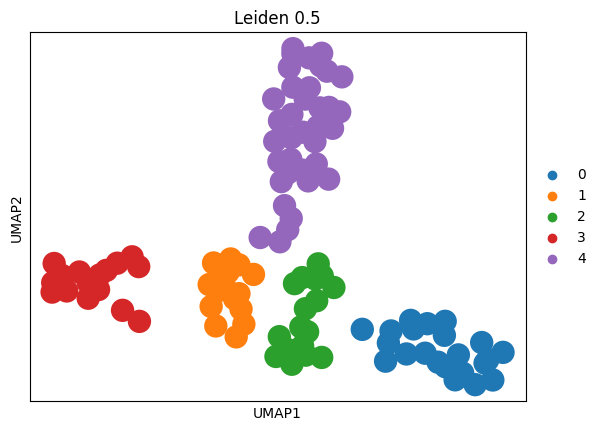

In [12]:
ep.pp.scale_norm(edata)
ep.pp.pca(edata)
ep.pp.neighbors(edata)
ep.tl.umap(edata)
ep.tl.leiden(edata, resolution=0.5, key_added="leiden_0_5")
ep.pl.umap(edata, color=["leiden_0_5"], title="Leiden 0.5")

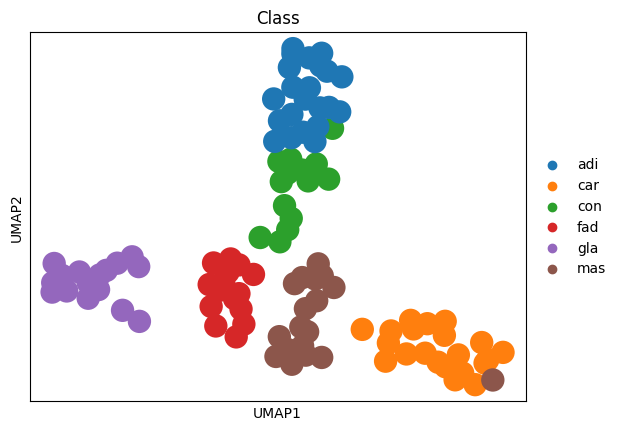

In [13]:
ep.pl.umap(edata, color=["Class"], ncols=1, wspace=0.75)